In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer 
from qiskit import transpile
from qiskit.circuit import QuantumRegister, ClassicalRegister
from qiskit.primitives import BackendSampler
from qiskit.visualization import plot_distribution, plot_histogram
import numpy as np


## Data

In [2]:
# Dictionary to store categories with ambiguous nouns and verbs
ambiguous_nouns = {
    "Animals": {
        "nouns": ["Crane", "Mouse", "Bat", "Seal", "Mole", "Duck"],
        "verbs": ["Catch"]
    },
    "Technology/Devices": {
        "nouns": ["Mouse", "Fan", "Pen"],
        "verbs": ["Turn on"]
    },
    "Food": {
        "nouns": ["Date", "Jam"],
        "verbs": ["Eat"]
    },
    "Body Parts": {
        "nouns": ["Chest", "Palm"],
        "verbs": ["Examine"]
    },
    "Nature": {
        "nouns": ["Rock", "Wave", "Bark"],
        "verbs": ["Explore"]
    },
    "Plants": {
        "nouns": ["Palm"],
        "verbs": ["Cultivate"]
    },
    "Tools/Equipment": {
        "nouns": ["Crane", "Bat", "Pitch", "Bolt", "Pen", "Seal"],
        "verbs": ["Utilize"]
    },
    "Music/Sound": {
        "nouns": ["Rock", "Pitch", "Bark"],
        "verbs": ["Listen"]
    },
    "Communication/Writing": {
        "nouns": ["Stress", "Date"],
        "verbs": ["Emphasize"]
    },
    "Emotion/Feeling": {
        "nouns": ["Stress"],
        "verbs": ["Feel"]
    },
    "Weather/Elements": {
        "nouns": ["Bolt"],
        "verbs": ["Observe"]
    },
    "Action/Movement": {
        "nouns": ["Wave", "Duck"],
        "verbs": ["Perform"]
    },
    "Objects/Containers": {
        "nouns": ["Chest"],
        "verbs": ["Fill"]
    },
    "Traffic/Transportation": {
        "nouns": ["Jam"],
        "verbs": ["Avoid"]
    },
    "Espionage": {
        "nouns": ["Mole"],
        "verbs": ["Uncover"]
    },
    "People": {
        "nouns": ["Fan"],
        "verbs": ["Admire"]
    }
}

# Dictionary to store categories with unambiguous nouns
unambiguous_nouns = {
    "Animals": ["Elephant", "Dolphin"],
    "Technology/Devices": ["Computer", "Air conditioner"],
    "Food": ["Apple", "Bread"],
    "Body Parts": ["Heart", "Liver"],
    "Nature": ["Mountain", "Ocean"],
    "Plants": ["Tree", "Flower"],
    "Tools/Equipment": ["Hammer", "Screwdriver"],
    "Music/Sound": ["Guitar", "Symphony"],
    "Communication/Writing": ["Book", "Email"],
    "Emotion/Feeling": ["Happiness", "Sadness"],
    "Weather/Elements": ["Thunderstorm", "Rainbow"],
    "Action/Movement": ["Dance", "Jump"],
    "Objects/Containers": ["Box", "Jar"],
    "Traffic/Transportation": ["Car", "Bicycle"],
    "Espionage": ["Surveillance", "Infiltration"],
    "People": ["Teacher", "Doctor"]
}

Classified verb phrases into 10 categories.

In [3]:
vp_list = ["Action", "Operation", "Consumption", "Medical Examination", "Exploration", "Gardening", "Communication", "Emotion", "Observation", "Investigation"]

vp_dim = vp_list.__len__()
vp_dim

10

In [4]:
category_noun_dictionary = dict()
for category in ambiguous_nouns.keys():
    category_noun_dictionary[category] = ambiguous_nouns[category]["nouns"] + unambiguous_nouns[category]



## Nouns

Put nouns and their vector representation in the python dictionary `noun_vec_dictionary`.

In [5]:
category_list = list(ambiguous_nouns.keys()) 
noun_dim = category_list.__len__()
noun_dim
print(category_list)

['Animals', 'Technology/Devices', 'Food', 'Body Parts', 'Nature', 'Plants', 'Tools/Equipment', 'Music/Sound', 'Communication/Writing', 'Emotion/Feeling', 'Weather/Elements', 'Action/Movement', 'Objects/Containers', 'Traffic/Transportation', 'Espionage', 'People']


In [6]:
a_noun_vocab = set()

for category in category_list:
    a_noun_vocab.update(ambiguous_nouns[category]['nouns'])

print(a_noun_vocab)
a_noun_list = list(a_noun_vocab)
a_noun_list.__len__()


{'Seal', 'Duck', 'Mole', 'Pen', 'Bolt', 'Palm', 'Stress', 'Rock', 'Pitch', 'Bat', 'Mouse', 'Crane', 'Chest', 'Wave', 'Date', 'Bark', 'Jam', 'Fan'}


18

In [7]:
noun_vocab = set()
for category in category_noun_dictionary.keys():
    noun_vocab.update(category_noun_dictionary[category])
noun_list = list(noun_vocab)
noun_list.__len__()

50

In [8]:
ua_noun_vocab = noun_vocab - a_noun_vocab
print(ua_noun_vocab)
ua_noun_list = list(noun_vocab - a_noun_vocab)
ua_noun_list.__len__()

{'Guitar', 'Screwdriver', 'Email', 'Bicycle', 'Tree', 'Dolphin', 'Symphony', 'Box', 'Heart', 'Rainbow', 'Flower', 'Doctor', 'Mountain', 'Sadness', 'Apple', 'Bread', 'Air conditioner', 'Happiness', 'Surveillance', 'Car', 'Thunderstorm', 'Jar', 'Elephant', 'Liver', 'Computer', 'Hammer', 'Infiltration', 'Dance', 'Book', 'Jump', 'Teacher', 'Ocean'}


32

In [9]:
noun_vec_dictionary = dict()
for noun in noun_list:
    noun_vec = np.zeros(noun_dim)
    for i, category in enumerate(category_list):
        if noun in category_noun_dictionary[category]:
            noun_vec[i] = 1
    noun_vec_dictionary[noun] = noun_vec



In [38]:
print(noun_vec_dictionary['Infiltration'])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [10]:
verb_vocab = set()
for category in category_noun_dictionary.keys():
    verb_vocab.update(ambiguous_nouns[category]['verbs'])

print(verb_vocab)

{'Utilize', 'Uncover', 'Examine', 'Turn on', 'Eat', 'Listen', 'Cultivate', 'Admire', 'Explore', 'Observe', 'Emphasize', 'Feel', 'Avoid', 'Fill', 'Perform', 'Catch'}


## Verbs

Interpret verbs as matrices. Put verbs and their matrix representations in the dictionary `verb_matrix_dictionary`.

In [11]:
verb_list = [category["verbs"][0] for category in ambiguous_nouns.values() for verb in category["verbs"]]


In [12]:
verb_vp_dictionary = {'Catch': 'Action', 'Turn on': 'Operation', 'Eat': 'Consumption', 'Examine': 'Medical Examination', 'Explore': 'Exploration', 'Cultivate': 'Gardening', 'Utilize': 'Operation', 'Listen': 'Action', 'Emphasize': 'Communication', 'Feel': 'Emotion', 'Observe': 'Observation', 'Perform': 'Action', 'Fill': 'Action', 'Avoid': 'Action', 'Uncover': 'Investigation', 'Admire': 'Emotion'}

In [13]:
verb_matrix_dictionary = dict()
for verb in verb_vp_dictionary.keys():
    matrix = np.zeros((vp_dim, noun_dim))
    noun_index = verb_list.index(verb)
    vp_index = vp_list.index(verb_vp_dictionary[verb])
    matrix[vp_index, noun_index] = 1
    verb_matrix_dictionary[verb] = matrix

In [14]:
verb_matrix_dictionary["Cultivate"]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## Quantum Circuits

In [55]:
category_qubits = [QuantumRegister(1, name=category) for category in category_list]


In [56]:
noun_qc_dictionary = dict()
for noun in noun_list:
    noun_vec = noun_vec_dictionary[noun]
    noun_qc = QuantumCircuit(*category_qubits)
    indices = []
    for i in range(noun_dim):
        if noun_vec[i] == 1:
            noun_qc.x(i)
            # indices.append(i)
    noun_qc_dictionary[noun] = noun_qc 
    indices = []

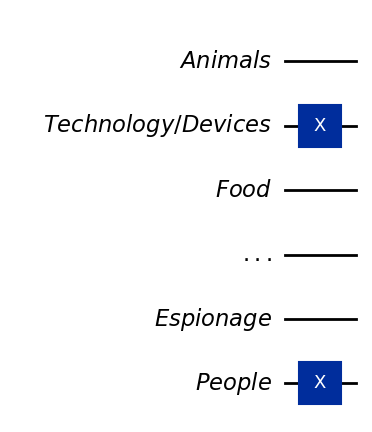

In [90]:
ell_qr = QuantumRegister(1, name = '...')
fan_qc = QuantumCircuit(category_qubits[0], category_qubits[1], category_qubits[2], ell_qr, category_qubits[-2], category_qubits[-1])
fan_qc.x(1)
fan_qc.x(5)
fan_qc.draw('mpl')

In [62]:
vp_qubits = [QuantumRegister(1, name=vp) for vp in vp_list]
# test_verb_qc = QuantumCircuit(*category_qubits, *vp_qubits)?test_verb_qc.draw('mpl')

In [63]:
verb_qc_dictionary = dict()
for verb in verb_matrix_dictionary.keys():
    result = []
    verb_matrix = verb_matrix_dictionary[verb]
    verb_qc = QuantumCircuit(*category_qubits, *vp_qubits)
    for i in range(vp_dim):
        for j in range(noun_dim):
            if verb_matrix[i, j]==1:
                verb_qc.cx(category_qubits[j], vp_qubits[i])
                result = [verb_qc, i]

    verb_qc_dictionary[verb] = result
    result = []



In [20]:
def is_acted_on(verb_ind, noun_ind):
    if verb_ind == noun_ind:
        return True
    else:
        return False

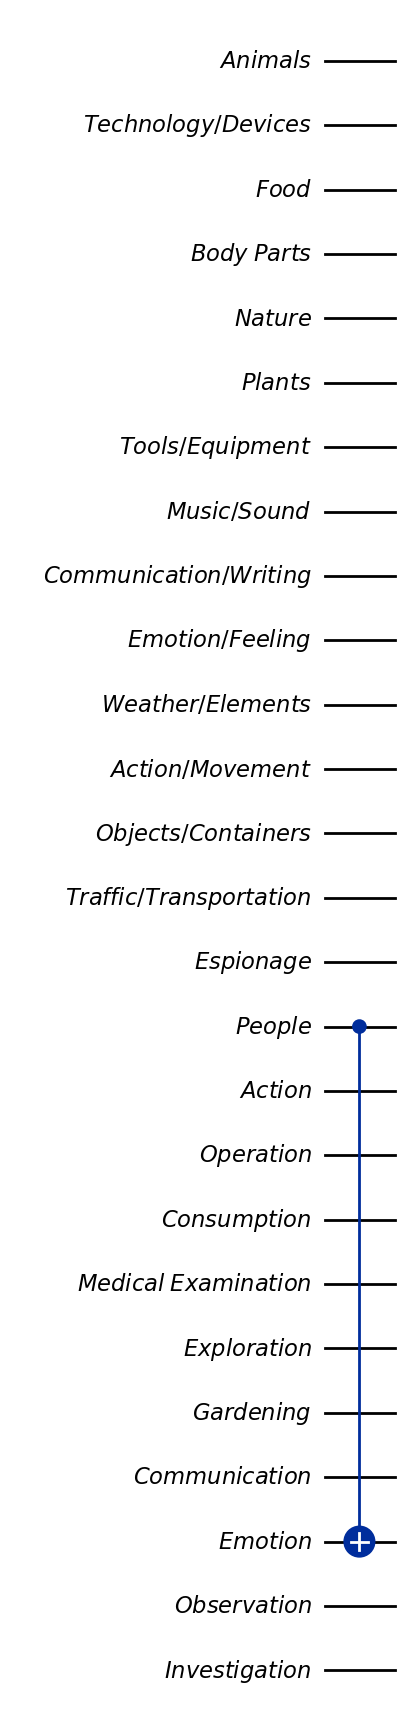

In [68]:
verb_qc_dictionary['Admire'][0].draw('mpl')

In [96]:
ell_qr1 = QuantumRegister(1, name = '.....')
ell_qr2 = QuantumRegister(1, name = '....')

Draw Figure 2 in the poster

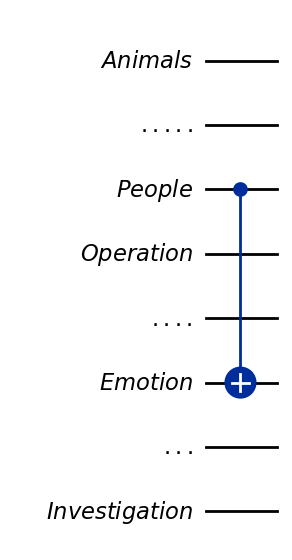

In [97]:

admire_qc = QuantumCircuit(category_qubits[0], ell_qr1, category_qubits[-1], vp_qubits[1], ell_qr2, vp_qubits[7], ell_qr, vp_qubits[-1])
admire_qc.cx(category_qubits[-1], vp_qubits[7])

admire_qc.draw('mpl')

Draw Figure 3 in the poster

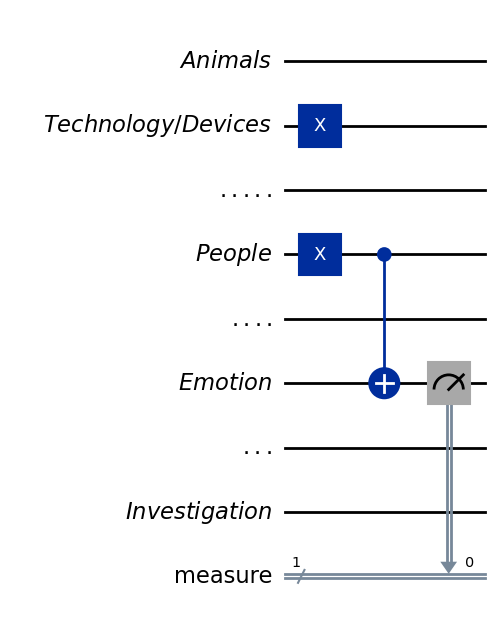

In [105]:
cr = ClassicalRegister(1, name='measure')
admire_fan_qc = QuantumCircuit(category_qubits[0], category_qubits[1], ell_qr1, category_qubits[-1], ell_qr2, vp_qubits[7],ell_qr, vp_qubits[-1], cr)
admire_fan_qc.x(category_qubits[1])
admire_fan_qc.x(category_qubits[-1])
admire_fan_qc.cx(category_qubits[-1], vp_qubits[7])
admire_fan_qc.measure(vp_qubits[7], cr)
admire_fan_qc.draw('mpl')

In [22]:
def measure_vp_qciruit(verb: str, noun: str, category_qubits, vp_qubits, noun_qc_dictionary, verb_qc_dictionary):
    measure_cbit = ClassicalRegister(1, 'measurement')
    noun_qc = noun_qc_dictionary[noun]
    verb_qc = verb_qc_dictionary[verb][0]
    vp_index = verb_qc_dictionary[verb][1]

    
    vp_qc = QuantumCircuit(*category_qubits, *vp_qubits, measure_cbit)
    vp_qc.compose(noun_qc, inplace=True)
    vp_qc.compose(verb_qc, inplace=True)
    # print(f"noun_index: {noun_index}, vp_index: {vp_index}")
    vp_qc.measure(vp_qubits[vp_index], measure_cbit)
    return vp_qc


## Results

In [23]:
# this is the qasm simulator backend
backend = Aer.get_backend('qasm_simulator')



### Results on Real Quantum Computers

In [24]:
def get_qc_results(qc, backend, shots):
    b_qc = transpile(qc, backend)
    job = backend.run(b_qc, shots = shots)
    result = job.result()
    return result.get_counts()

In [26]:
import random

In [45]:
# This is the function that gets the distributions on a backend
def get_final_distributions(backend, shots, num_nouns):

    noun_vp_hist_dict = dict()
    random_a_noun_list = random.sample(a_noun_list, num_nouns)
    random_ua_noun_list = random.sample(ua_noun_list, num_nouns)
    for a_noun in random_a_noun_list:
        vp_hist_dict = dict()   
        for verb in verb_list:
            vp_qc = measure_vp_qciruit(verb, a_noun, category_qubits, vp_qubits, noun_qc_dictionary, verb_qc_dictionary)

            vp = verb + ' ' + a_noun

            hist = get_qc_results(vp_qc, backend, shots)
            
            key = next(iter(hist.keys()))
            value = hist[key]
            if key == '1':
                vp_hist_dict[vp] = value 
            else:
                vp_hist_dict[vp] = 0
            print(vp, hist)
        noun_vp_hist_dict[a_noun] = vp_hist_dict



    for ua_noun in random_ua_noun_list:
        vp_hist_dict = dict()   
        for verb in verb_list:
            vp_qc = measure_vp_qciruit(verb, ua_noun, category_qubits, vp_qubits, noun_qc_dictionary, verb_qc_dictionary)

            vp = verb + ' ' + ua_noun

            hist = get_qc_results(vp_qc, backend, shots)
            
            key = next(iter(hist.keys()))
            value = hist[key]
            if key == '1':
                vp_hist_dict[vp] = value 
            else:
                vp_hist_dict[vp] = 0
            print(vp, hist)
        noun_vp_hist_dict[ua_noun] = vp_hist_dict
    return noun_vp_hist_dict


In [29]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler


In [30]:
 
# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="be331235f1fe9ab061b1955ca2c82e979ab6b711c3fbca011356eec4b2e4961ec4aed305c2194b28ead5e111923976c654f0f840c37ff3112c8a96757f5dc1b0",
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)
 
# Load saved credentials
service = QiskitRuntimeService()

In [31]:
# This is the real quantum computer
real_backend = service.least_busy(operational=True, simulator=False)

In [32]:
# pick 2 random ambiguous nouns and 2 random unambiguous nouns and run the experiment on real quantum computers
real_distributions = get_final_distributions(real_backend, 1000, 2)

/var/folders/h9/f_ydc3yj58j6jstgwjqcl3jr0000gn/T/ipykernel_54758/901246560.py:3: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime.
  job = backend.run(b_qc, shots = shots)


Catch Fan {'1': 18, '0': 982}
Turn on Fan {'1': 990, '0': 10}
Eat Fan {'1': 15, '0': 985}
Examine Fan {'0': 986, '1': 14}
Explore Fan {'1': 17, '0': 983}
Cultivate Fan {'1': 22, '0': 978}
Utilize Fan {'0': 989, '1': 11}
Listen Fan {'1': 10, '0': 990}
Emphasize Fan {'1': 15, '0': 985}
Feel Fan {'0': 986, '1': 14}
Observe Fan {'0': 985, '1': 15}
Perform Fan {'0': 987, '1': 13}
Fill Fan {'1': 11, '0': 989}
Avoid Fan {'0': 988, '1': 12}
Uncover Fan {'1': 21, '0': 979}
Admire Fan {'0': 11, '1': 989}
Catch Chest {'1': 18, '0': 982}
Turn on Chest {'0': 980, '1': 20}
Eat Chest {'0': 981, '1': 19}
Examine Chest {'0': 15, '1': 985}
Explore Chest {'1': 19, '0': 981}
Cultivate Chest {'0': 987, '1': 13}
Utilize Chest {'0': 985, '1': 15}
Listen Chest {'0': 982, '1': 18}
Emphasize Chest {'1': 19, '0': 981}
Feel Chest {'0': 981, '1': 19}
Observe Chest {'0': 984, '1': 16}
Perform Chest {'1': 22, '0': 978}
Fill Chest {'1': 985, '0': 15}
Avoid Chest {'0': 989, '1': 11}
Uncover Chest {'1': 14, '0': 986}
A

In [34]:
# store the results in a dictionary, so that we can plot the histograms using matplotlib
real_dists = {
    "Fan": {
        "Catch Fan": {'1': 18, '0': 982},
        "Turn on Fan": {'1': 990, '0': 10},
        "Eat Fan": {'1': 15, '0': 985},
        "Examine Fan": {'0': 986, '1': 14},
        "Explore Fan": {'1': 17, '0': 983},
        "Cultivate Fan": {'1': 22, '0': 978},
        "Utilize Fan": {'0': 989, '1': 11},
        "Listen Fan": {'1': 10, '0': 990},
        "Emphasize Fan": {'1': 15, '0': 985},
        "Feel Fan": {'0': 986, '1': 14},
        "Observe Fan": {'0': 985, '1': 15},
        "Perform Fan": {'0': 987, '1': 13},
        "Fill Fan": {'1': 11, '0': 989},
        "Avoid Fan": {'0': 988, '1': 12},
        "Uncover Fan": {'1': 21, '0': 979},
        "Admire Fan": {'0': 11, '1': 989}
    },
    "Chest": {
        "Catch Chest": {'1': 18, '0': 982},
        "Turn on Chest": {'0': 980, '1': 20},
        "Eat Chest": {'0': 981, '1': 19},
        "Examine Chest": {'0': 15, '1': 985},
        "Explore Chest": {'1': 19, '0': 981},
        "Cultivate Chest": {'0': 987, '1': 13},
        "Utilize Chest": {'0': 985, '1': 15},
        "Listen Chest": {'0': 982, '1': 18},
        "Emphasize Chest": {'1': 19, '0': 981},
        "Feel Chest": {'0': 981, '1': 19},
        "Observe Chest": {'0': 984, '1': 16},
        "Perform Chest": {'1': 22, '0': 978},
        "Fill Chest": {'1': 985, '0': 15},
        "Avoid Chest": {'0': 989, '1': 11},
        "Uncover Chest": {'1': 14, '0': 986},
        "Admire Chest": {'1': 16, '0': 984}
    },
    "Flower": {
        "Catch Flower": {'0': 985, '1': 15},
        "Turn on Flower": {'0': 990, '1': 10},
        "Eat Flower": {'1': 26, '0': 974},
        "Examine Flower": {'0': 981, '1': 19},
        "Explore Flower": {'0': 987, '1': 13},
        "Cultivate Flower": {'0': 12, '1': 988},
        "Utilize Flower": {'0': 982, '1': 18},
        "Listen Flower": {'1': 17, '0': 983},
        "Emphasize Flower": {'1': 10, '0': 990},
        "Feel Flower": {'0': 986, '1': 14},
        "Observe Flower": {'0': 985, '1': 15},
        "Perform Flower": {'1': 10, '0': 990},
        "Fill Flower": {'1': 19, '0': 981},
        "Avoid Flower": {'0': 980, '1': 20},
        "Uncover Flower": {'0': 981, '1': 19},
        "Admire Flower": {'0': 982, '1': 18}
    },
    "Happiness": {
        "Catch Happiness": {'0': 984, '1': 16},
        "Turn on Happiness": {'0': 979, '1': 21},
        "Eat Happiness": {'0': 979, '1': 21},
        "Examine Happiness": {'1': 19, '0': 981},
        "Explore Happiness": {'0': 980, '1': 20},
        "Cultivate Happiness": {'1': 12, '0': 988},
        "Utilize Happiness": {'0': 970, '1': 30},
        "Listen Happiness": {'1': 21, '0': 979},
        "Emphasize Happiness": {'0': 978, '1': 22},
        "Feel Happiness": {'0': 179, '1': 821},
        "Observe Happiness": {'0': 980, '1': 20},
        "Perform Happiness": {'0': 977, '1': 23},
        "Fill Happiness": {'1': 22, '0': 978},
        "Avoid Happiness": {'0': 981, '1': 19},
        "Uncover Happiness": {'1': 19, '0': 981},
        "Admire Happiness": {'0': 982, '1': 18}
    }
}

In [168]:
import matplotlib.pyplot as plt

def plot_hist(results, noun, device):
    labels = list(results.keys())
    zeros = [results[vp]['0'] for vp in labels]
    ones = [results[vp]['1'] for vp in labels]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(15, 7))
    rects1 = ax.bar(x - width/2, zeros, width, label='0')
    rects2 = ax.bar(x + width/2, ones, width, label='1')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Counts')
    ax.set_title(f'Distributions of Disambiguation for {noun} on {device} ')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.legend()

    # Function to add labels on bars
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    # Call the function to add labels
    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()

Distributions on `ibm_kyoto` in Table 2 in the poster

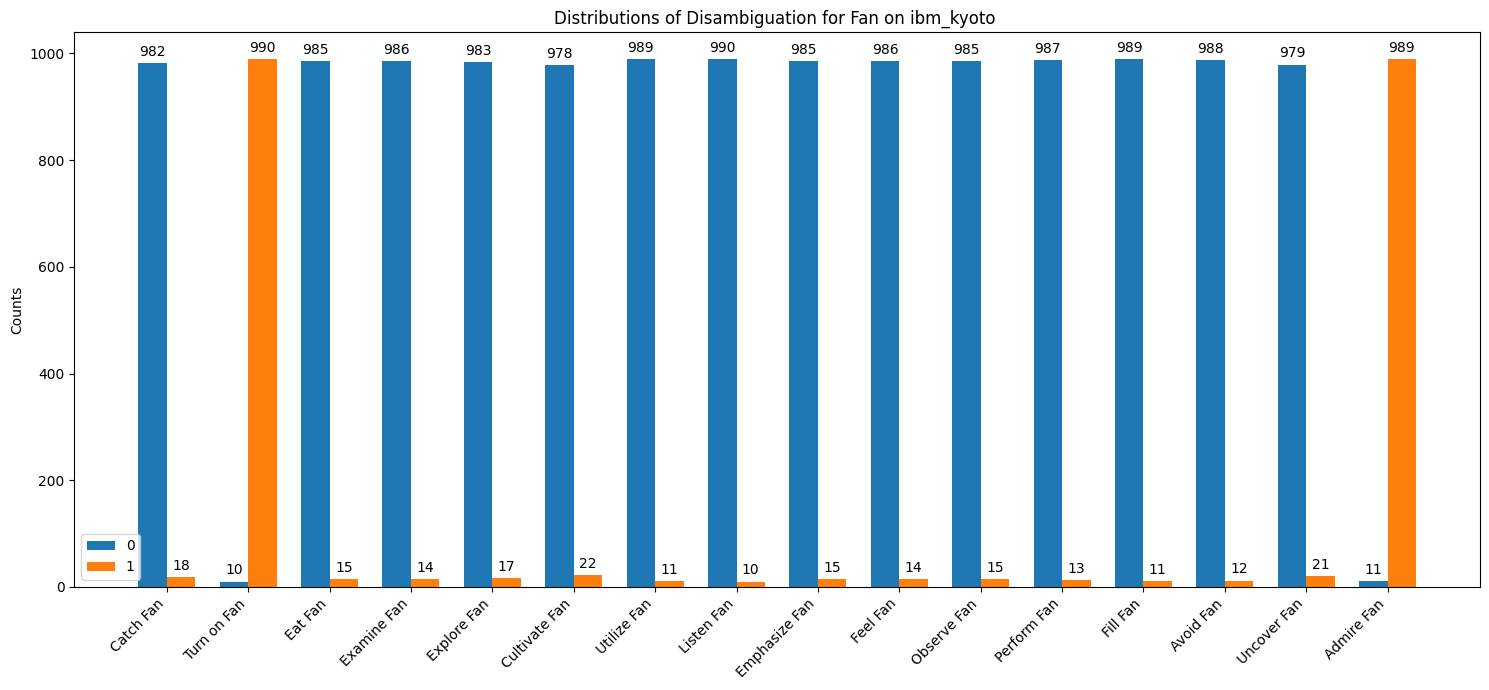

In [169]:
plot_hist(real_dists["Fan"], "Fan", "ibm_kyoto")

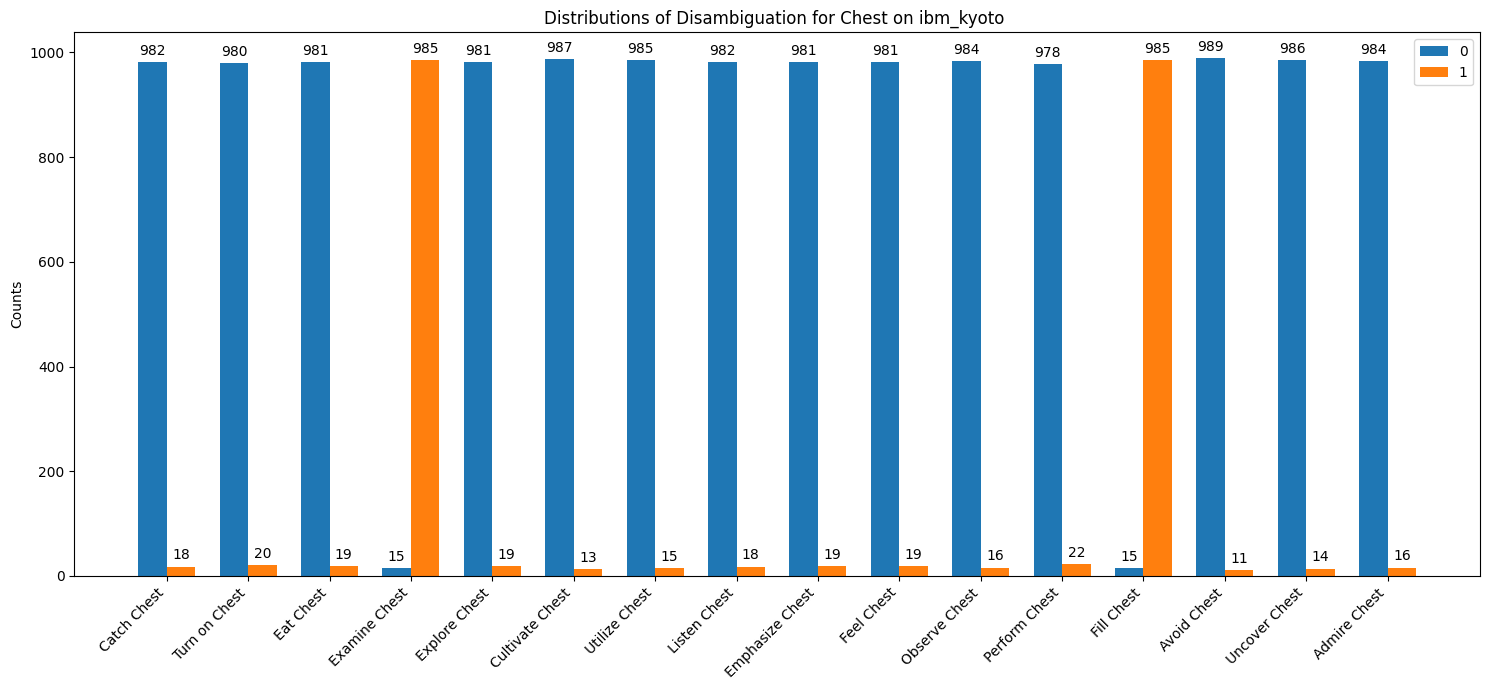

In [170]:
plot_hist(real_dists["Chest"], "Chest", "ibm_kyoto")

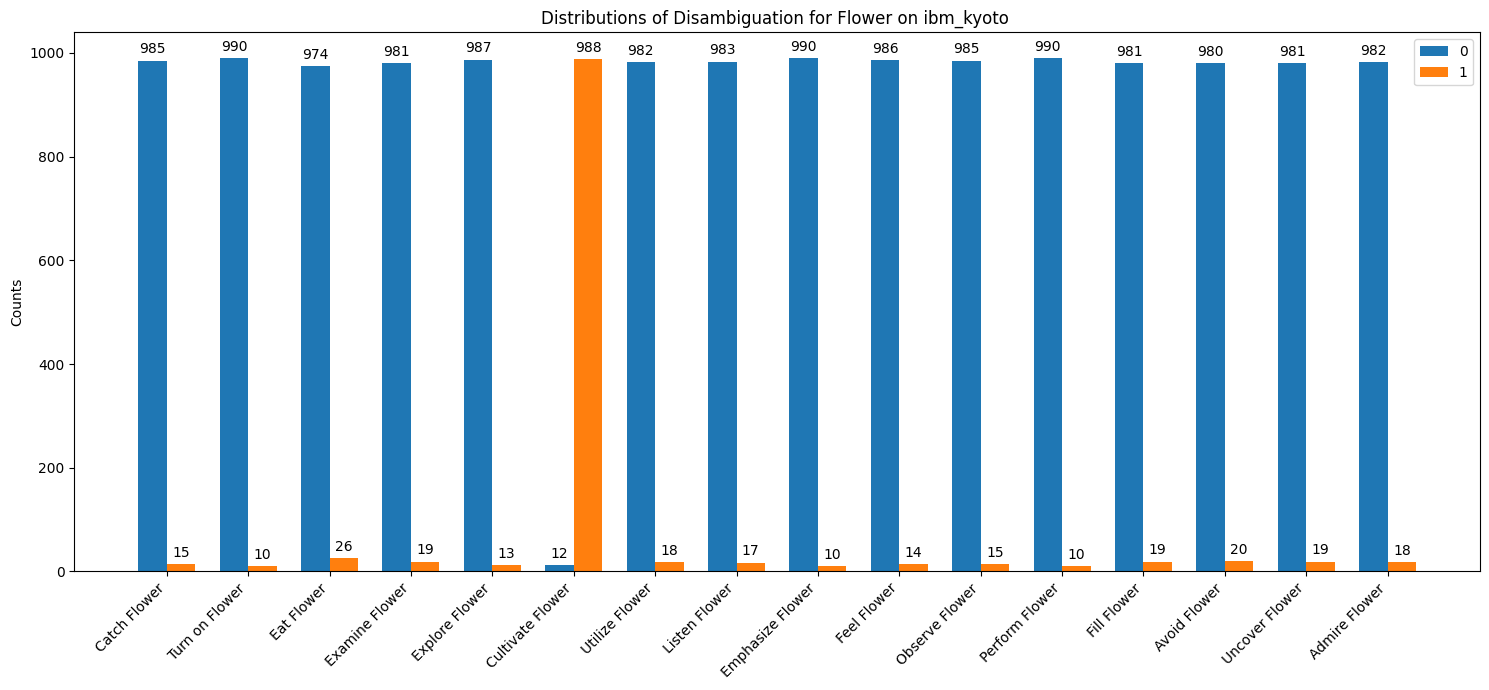

In [171]:
plot_hist(real_dists["Flower"], "Flower", "ibm_kyoto")

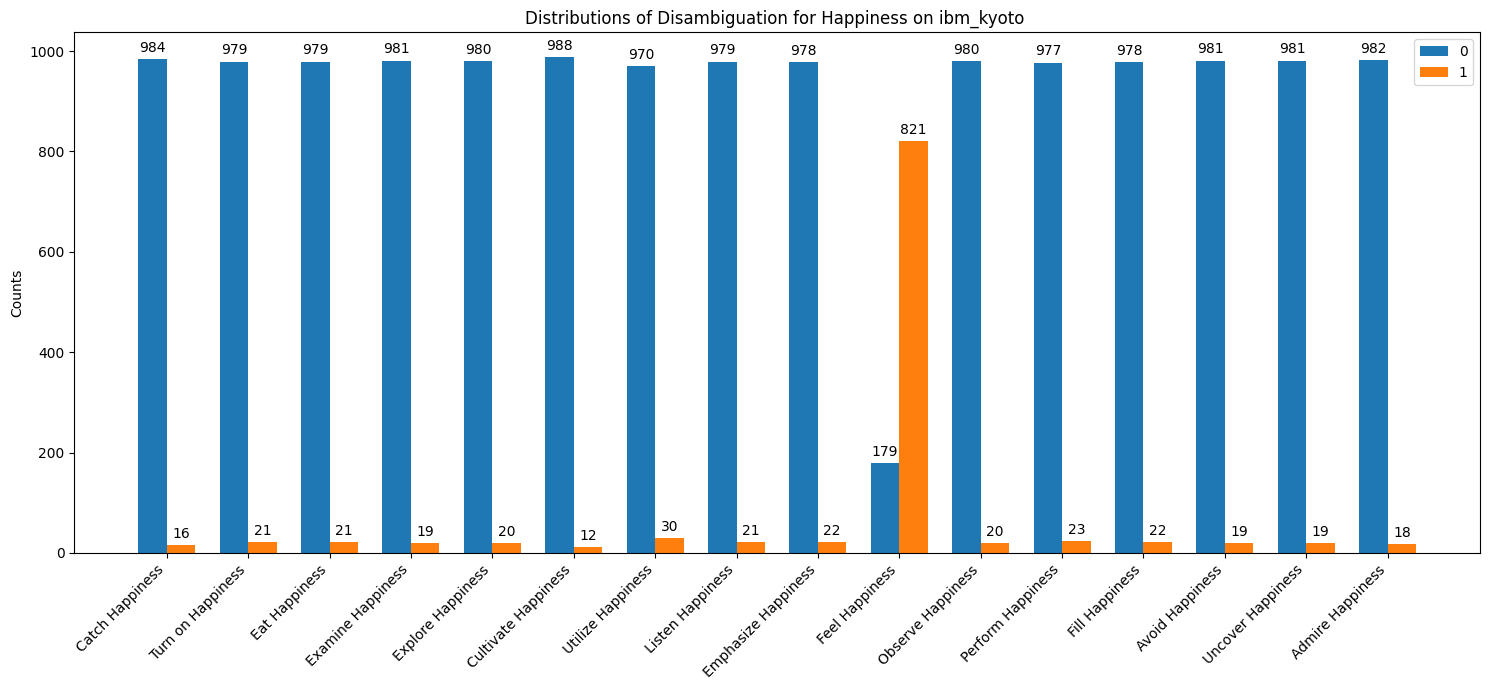

In [172]:
plot_hist(real_dists["Happiness"], "Happiness", "ibm_kyoto")

### Results on QASM Simulator

In [173]:
def get_sim_distributions(backend, shots):

    noun_vp_hist_dict = dict()
    for a_noun in ["Fan", "Chest"]:
        vp_hist_dict = dict()   
        for verb in verb_list:
            vp_qc = measure_vp_qciruit(verb, a_noun, category_qubits, vp_qubits, noun_qc_dictionary, verb_qc_dictionary)

            vp = verb + ' ' + a_noun

            hist = get_qc_results(vp_qc, backend, shots)
            
            key = next(iter(hist.keys()))
            value = hist[key]
            if key == '1':
                vp_hist_dict[vp] = {'0':shots-value, '1':value}
            else:
                vp_hist_dict[vp] = {'0':value, '1':shots-value}
        noun_vp_hist_dict[a_noun] = vp_hist_dict



    for ua_noun in ["Flower", "Happiness"]:
        vp_hist_dict = dict()   
        for verb in verb_list:
            vp_qc = measure_vp_qciruit(verb, ua_noun, category_qubits, vp_qubits, noun_qc_dictionary, verb_qc_dictionary)

            vp = verb + ' ' + ua_noun

            hist = get_qc_results(vp_qc, backend, shots)
            
            key = next(iter(hist.keys()))
            value = hist[key]
            if key == '1':
                vp_hist_dict[vp] = {'0':shots-value, '1':value}
            else:
                vp_hist_dict[vp] = {'0':value, '1':shots-value}
            # print(vp, hist)
        noun_vp_hist_dict[ua_noun] = vp_hist_dict
    return noun_vp_hist_dict


In [174]:
sim_dists = get_sim_distributions(backend, 1000)
sim_dists

{'Fan': {'Catch Fan': {'0': 1000, '1': 0},
  'Turn on Fan': {'0': 0, '1': 1000},
  'Eat Fan': {'0': 1000, '1': 0},
  'Examine Fan': {'0': 1000, '1': 0},
  'Explore Fan': {'0': 1000, '1': 0},
  'Cultivate Fan': {'0': 1000, '1': 0},
  'Utilize Fan': {'0': 1000, '1': 0},
  'Listen Fan': {'0': 1000, '1': 0},
  'Emphasize Fan': {'0': 1000, '1': 0},
  'Feel Fan': {'0': 1000, '1': 0},
  'Observe Fan': {'0': 1000, '1': 0},
  'Perform Fan': {'0': 1000, '1': 0},
  'Fill Fan': {'0': 1000, '1': 0},
  'Avoid Fan': {'0': 1000, '1': 0},
  'Uncover Fan': {'0': 1000, '1': 0},
  'Admire Fan': {'0': 0, '1': 1000}},
 'Chest': {'Catch Chest': {'0': 1000, '1': 0},
  'Turn on Chest': {'0': 1000, '1': 0},
  'Eat Chest': {'0': 1000, '1': 0},
  'Examine Chest': {'0': 0, '1': 1000},
  'Explore Chest': {'0': 1000, '1': 0},
  'Cultivate Chest': {'0': 1000, '1': 0},
  'Utilize Chest': {'0': 1000, '1': 0},
  'Listen Chest': {'0': 1000, '1': 0},
  'Emphasize Chest': {'0': 1000, '1': 0},
  'Feel Chest': {'0': 1000, '1

Distributions on `qasm_simulator` in Table 2 in the poster

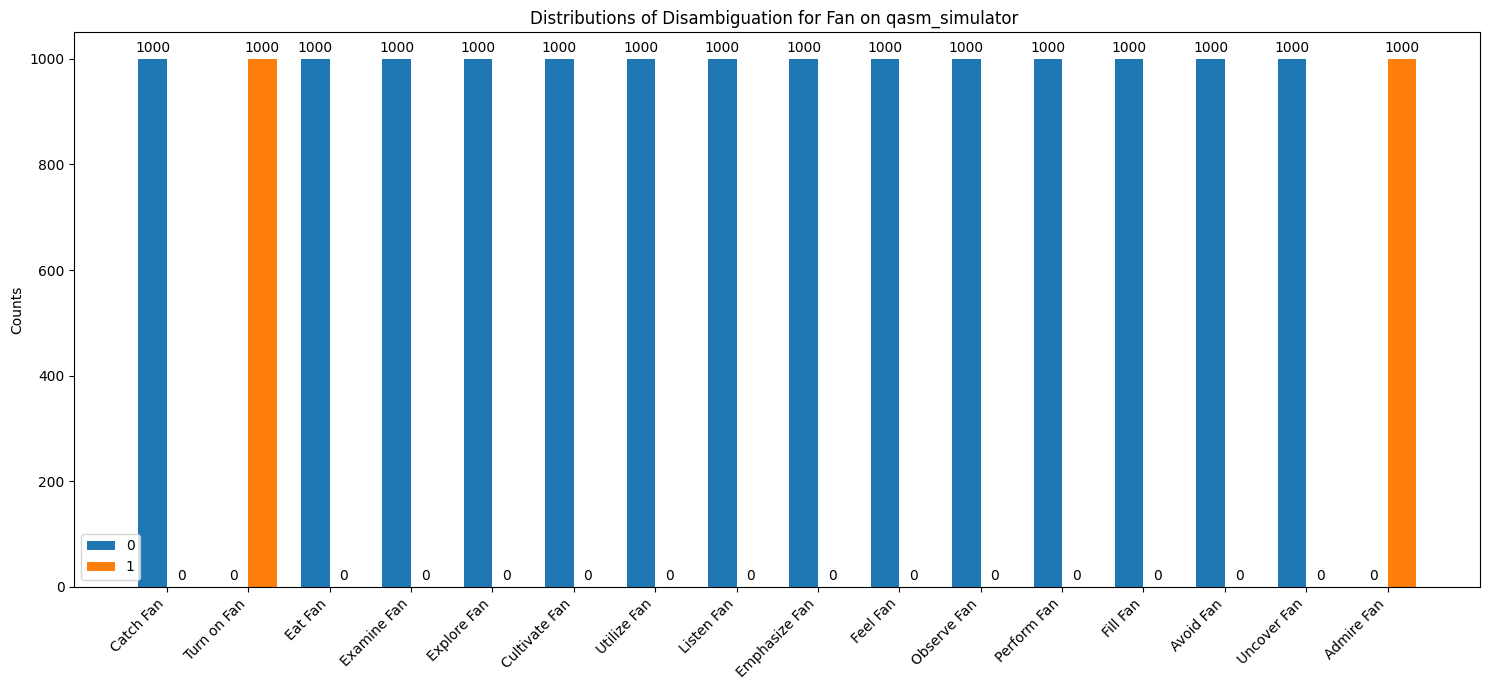

In [175]:
plot_hist(sim_dists["Fan"], "Fan", "qasm_simulator")

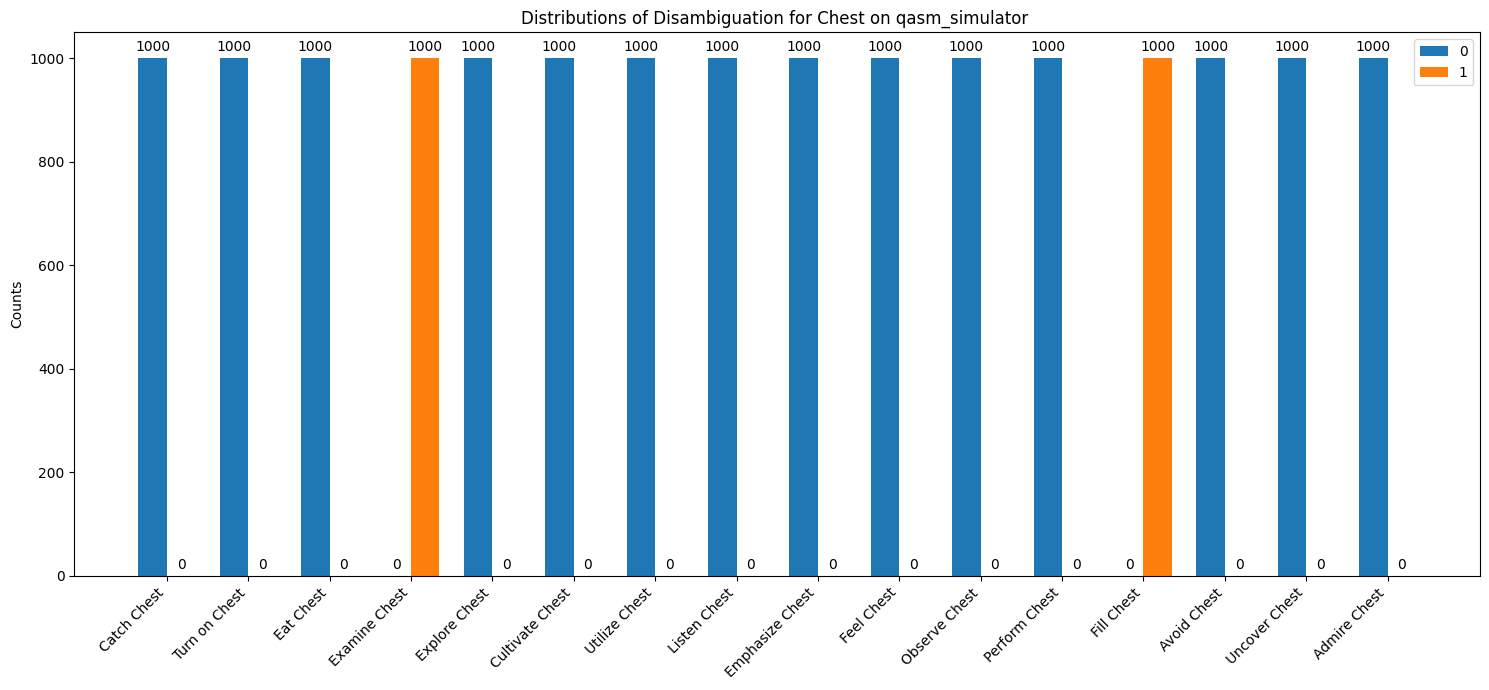

In [176]:
plot_hist(sim_dists["Chest"], "Chest", "qasm_simulator")

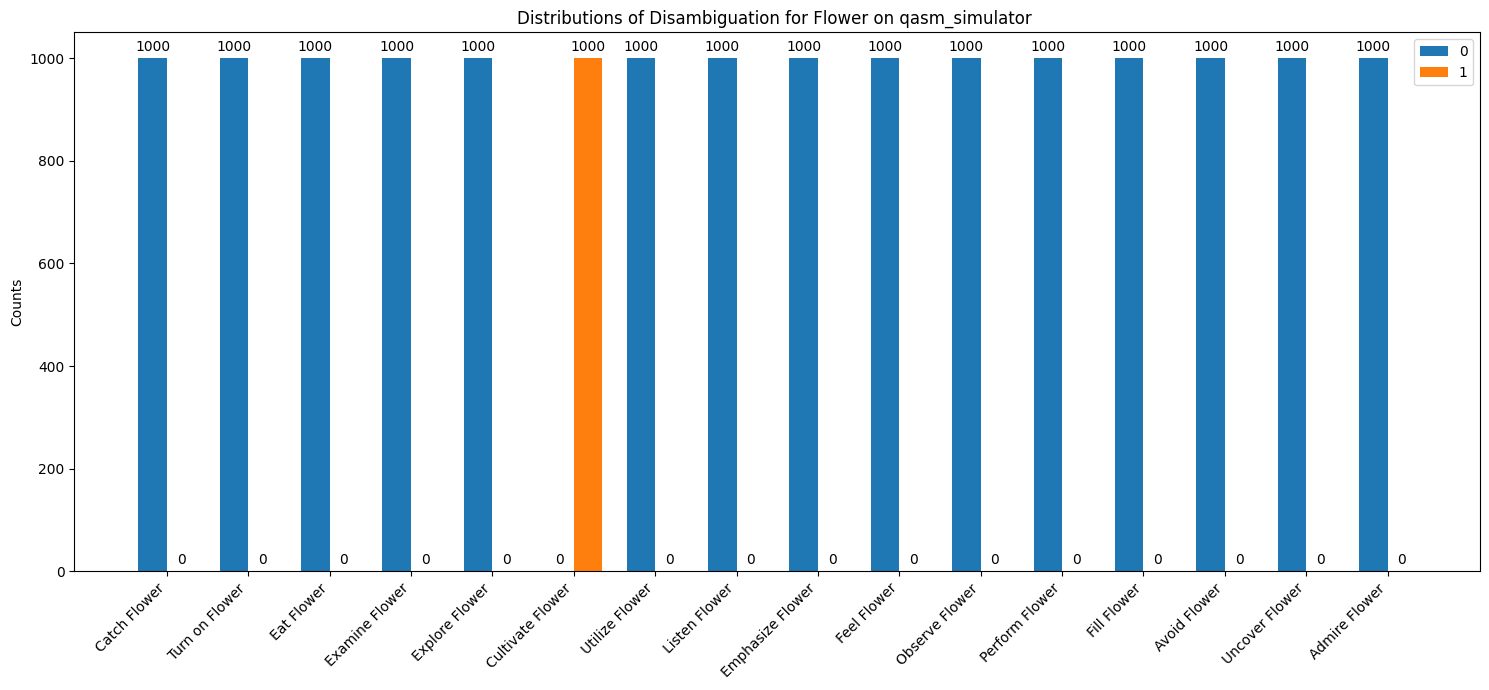

In [177]:
plot_hist(sim_dists["Flower"], "Flower", "qasm_simulator")

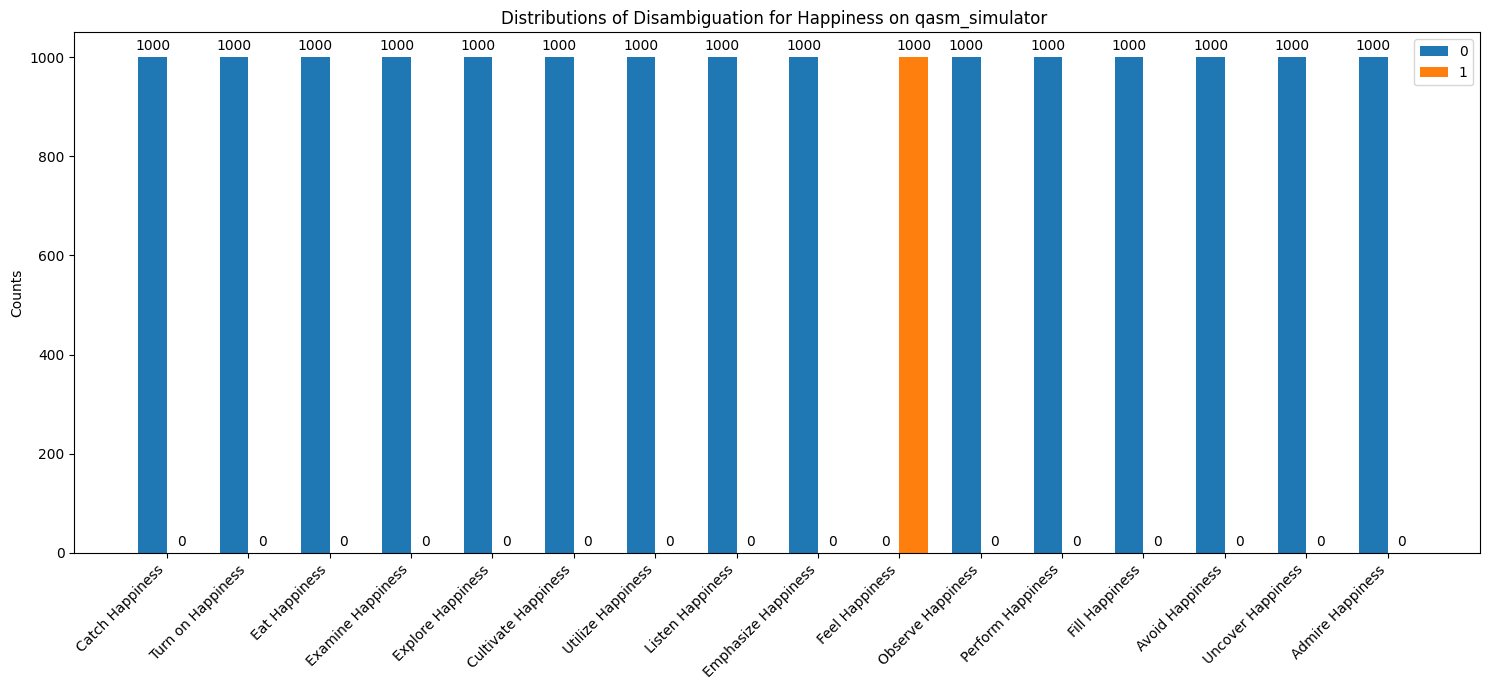

In [178]:
plot_hist(sim_dists["Happiness"], "Happiness", "qasm_simulator")